# Optimization of an IoV system

In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the data

In [512]:
rsu = pd.read_csv('data/rsu.csv')
es = pd.read_csv('data/es.csv')
tasks = pd.read_csv('data/tasks.csv')

# Generating a Network

In [513]:
def get_network(rsu: pd.DataFrame, es: pd.DataFrame):
    # choose a random number of RSUs M
    M = np.random.randint(1, len(rsu))
    # choose a random number of ESs W, with W < M
    W = np.random.randint(1, M)

    # choose M random RSUs
    rsu = rsu.sample(M)
    # choose W random ESs
    es = es.sample(W)

    # add the prefix 'RSU_' to the columns of rsu
    rsu.columns = ['RSU_' + col for col in rsu.columns]
    # add the prefix 'ES_' to the columns of es
    es.columns = ['ES_' + col for col in es.columns]

    # shuffle the rows of both dataframes
    rsu = rsu.sample(frac=1).reset_index(drop=True)
    es = es.sample(frac=1).reset_index(drop=True)

    # merge the rsu and es dataframes 
    rsu = pd.concat([rsu, es], axis=1)

    # shuffle the rows of rsu again
    rsu = rsu.sample(frac=1).reset_index(drop=True)

    # fill the empty ES_ID with 'AP'
    rsu['ES_ID'] = rsu['ES_ID'].fillna('AP')
    # fill the rest of the empty values with 0
    rsu = rsu.fillna(0)

    return {
        'M': M,
        'W': W,
        'network': rsu,
    }


In [514]:
network = get_network(rsu, es)

In [515]:
print(f"Number of RSUs: {network['M']}")
print(f"Number of ESs: {network['W']}")

Number of RSUs: 88
Number of ESs: 22


In [516]:
network['network'].head()

,RSU_ID,RSU_X,RSU_Y,RSU_DTR,ES_ID,ES_VM_NB,ES_VM_CP
0,20,90,78,42,21.0,1.0,2.0
1,69,77,33,34,AP,0.0,0.0
2,35,94,60,41,72.0,3.0,3.0
3,29,1,13,50,AP,0.0,0.0
4,64,31,6,10,AP,0.0,0.0


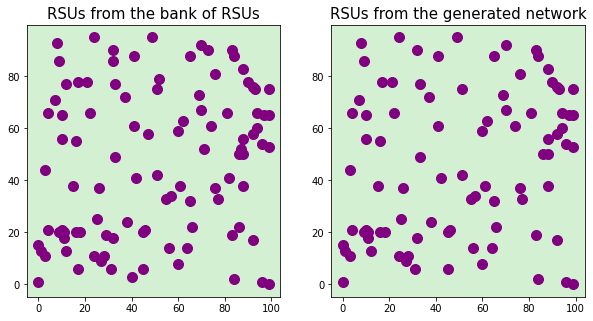

In [517]:
# display on the left the RSUs from the X and Y columns in the rsu dataframe
# display on the right the RSUs from the RSU_X and RSU_Y columns in the network dataframe
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(rsu['X'], rsu['Y'])
ax[1].scatter(network['network']['RSU_X'], network['network']['RSU_Y'])

# make the background of the plot light green
ax[0].set_facecolor('#d3f0d3')
ax[1].set_facecolor('#d3f0d3')

# increase the size of the points and make them purple
ax[0].scatter(rsu['X'], rsu['Y'], s=100, c='#800080')
ax[1].scatter(network['network']['RSU_X'], network['network']['RSU_Y'], s=100, c='#800080')

# add a title to each plot
ax[0].set_title('RSUs from the bank of RSUs')
ax[1].set_title('RSUs from the generated network')

# make the titles a bit bigger
ax[0].title.set_size(15)
ax[1].title.set_size(15)

plt.show()

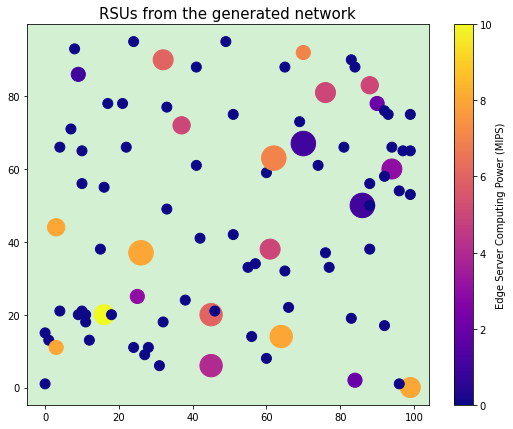

In [518]:
# plot all the RSU in the network dataframe
fig, ax = plt.subplots(figsize=(9, 7))

# set the background light green
ax.set_facecolor('#d3f0d3')


# make the colour of the points depend on the number of ES_VM_CP and add a colourbar
sc = ax.scatter(
    network['network']['RSU_X'],
    network['network']['RSU_Y'],
    s=(network['network']['ES_VM_NB'] + 1) * 100, # we add one to plot the points even if there is no ES
    c=network['network']['ES_VM_CP'],
    cmap='plasma')

# add a title
ax.set_title('RSUs from the generated network', size=15)

# set the title of the colorbar
plt.colorbar(sc).set_label('Edge Server Computing Power (MIPS)')